## Regularizing neural networks

### General imports

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
import random as rn
import os

### Keras specific imports

In [113]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop
from keras.constraints import maxnorm
from keras.regularizers import l2, l1

### First step is to load data from file and plot a few examples

In [114]:
train_x = pickle.load(open("MNIST_train_x.pkl", 'rb'))
train_y = pickle.load(open("MNIST_train_y.pkl", 'rb'))
test_x = pickle.load(open("MNIST_test_x.pkl", 'rb'))
test_y = pickle.load(open("MNIST_test_y.pkl", 'rb'))
print(type(train_x))
print(train_x.shape)
print(type(train_y))
print(train_y.shape)
print(type(test_x))
print(test_x.shape)
print(type(test_y))
print(test_y.shape)

# Creating subset of training data to speed up training
train_x_short = train_x[:5000]
train_y_short = train_y[:5000]
print(train_x_short.shape)
print(train_y_short.shape)

<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)
(5000, 784)
(5000, 10)


### Plot some examples

In [115]:
def plotExamples(data, labels):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

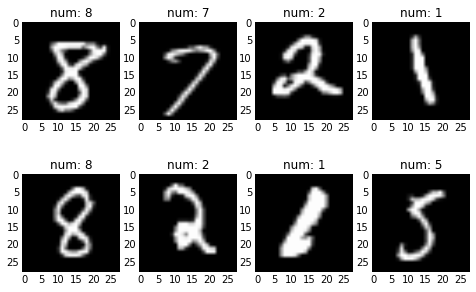

In [116]:
plotExamples(train_x, train_y)

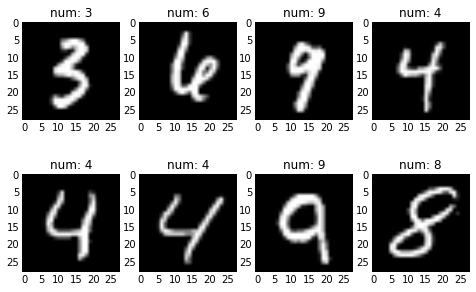

In [117]:
plotExamples(test_x, test_y)

## Motivating example: Few examples, network with a lot of capacity

In [118]:
model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_78 (Dense)                 (None, 1024)          803840      dense_input_38[0][0]             
____________________________________________________________________________________________________
activation_78 (Activation)       (None, 1024)          0           dense_78[0][0]                   
____________________________________________________________________________________________________
dense_79 (Dense)                 (None, 10)            10250       activation_78[0][0]              
____________________________________________________________________________________________________
activation_79 (Activation)       (None, 10)            0           dense_79[0][0]                   
Total params: 814090
______________________________________________________________________

### Helper functions

In [119]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    num_correct = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    accuracy = np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))
    
def get_correct_and_incorrect(model, test_x, test_y):
    result = model.predict(test_x)
    correct_indices = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    test_x_correct = test_x[correct_indices]
    test_y_correct = test_y[correct_indices]
    incorrect_indices = np.argmax(result, axis=1)!=np.argmax(test_y, axis=1)
    test_x_incorrect = test_x[incorrect_indices]
    test_y_incorrect = test_y[incorrect_indices]
    return test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect

In [120]:
accuracy(test_x, test_y, model)

Accuracy on data is: 80.10000000000001%


## L1 and L2 weight regularization

#### L2 weight regularization
- What happens as you change the value of the regularization parameter?
- Note what has happened to the value of the loss

In [121]:
model = Sequential()
model.add(Dense(1024, input_dim=784, W_regularizer=l2(0.1)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_80 (Dense)                 (None, 1024)          803840      dense_input_39[0][0]             
____________________________________________________________________________________________________
activation_80 (Activation)       (None, 1024)          0           dense_80[0][0]                   
____________________________________________________________________________________________________
dense_81 (Dense)                 (None, 10)            10250       activation_80[0][0]              
____________________________________________________________________________________________________
activation_81 (Activation)       (None, 10)            0           dense_81[0][0]                   
Total params: 814090
______________________________________________________________________

In [122]:
accuracy(test_x, test_y, model)

Accuracy on data is: 81.2%


#### L1 weight regularization
- What happens as you change the value of the regularization parameter?

In [123]:
model = Sequential()
model.add(Dense(1024, input_dim=784, W_regularizer=l1(0.1)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=25, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_82 (Dense)                 (None, 1024)          803840      dense_input_40[0][0]             
____________________________________________________________________________________________________
activation_82 (Activation)       (None, 1024)          0           dense_82[0][0]                   
____________________________________________________________________________________________________
dense_83 (Dense)                 (None, 10)            10250       activation_82[0][0]              
____________________________________________________________________________________________________
activation_83 (Activation)       (None, 10)            0           dense_83[0][0]                   
Total params: 814090
______________________________________________________________________

In [124]:
accuracy(test_x, test_y, model)

Accuracy on data is: 19.31%


### Dropout
- What happens if you increase the proportion of nodes dropped?

In [125]:
'''
Dropout is incorporated through a separate layer, the same dimension of the previous layer
Each node in the dropout layer corresponds to a node in the layer below it
The operation that each dropout layer node performs is to either output zero with probability p, 
or pass on the output of the previous layer node unchanged with probability (1-p)
This has the effect of randomly "deleting" nodes from the layer below with probability p each forward pass
during training
'''

model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_84 (Dense)                 (None, 1024)          803840      dense_input_41[0][0]             
____________________________________________________________________________________________________
activation_84 (Activation)       (None, 1024)          0           dense_84[0][0]                   
____________________________________________________________________________________________________
dropout_22 (Dropout)             (None, 1024)          0           activation_84[0][0]              
____________________________________________________________________________________________________
dense_85 (Dense)                 (None, 10)            10250       dropout_22[0][0]                 
___________________________________________________________________________________________

In [126]:
accuracy(test_x, test_y, model)

Accuracy on data is: 81.6%


In [127]:
# Increasing the size of the hidden layers
model = Sequential()
model.add(Dense(2048, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_86 (Dense)                 (None, 2048)          1607680     dense_input_42[0][0]             
____________________________________________________________________________________________________
activation_86 (Activation)       (None, 2048)          0           dense_86[0][0]                   
____________________________________________________________________________________________________
dropout_23 (Dropout)             (None, 2048)          0           activation_86[0][0]              
____________________________________________________________________________________________________
dense_87 (Dense)                 (None, 10)            20490       dropout_23[0][0]                 
___________________________________________________________________________________________

In [128]:
accuracy(test_x, test_y, model)

Accuracy on data is: 82.07%


### Combining different types of regularization
- L2 and Dropout

In [129]:
model = Sequential()
model.add(Dense(2048, input_dim=784, W_regularizer=l1(0.005)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_88 (Dense)                 (None, 2048)          1607680     dense_input_43[0][0]             
____________________________________________________________________________________________________
activation_88 (Activation)       (None, 2048)          0           dense_88[0][0]                   
____________________________________________________________________________________________________
dropout_24 (Dropout)             (None, 2048)          0           activation_88[0][0]              
____________________________________________________________________________________________________
dense_89 (Dense)                 (None, 10)            20490       dropout_24[0][0]                 
___________________________________________________________________________________________

In [130]:
accuracy(test_x, test_y, model)

Accuracy on data is: 83.26%
